Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import InterclusterDistance  # Inter cluster distance map

Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the dataset

In [3]:
df = pd.read_csv(r"/content/Dataset.csv")

Data pre-processing

In [4]:
data = df.copy()
data.head

<bound method NDFrame.head of       Unnamed: 0        PC1       PC2       PC3       PC4       PC5       PC6  \
0              0 -22.292954 -1.600691  0.330602 -0.013734  0.090183  0.020969   
1              1 -21.826742 -1.622691  0.325296 -0.000968  0.106613  0.029512   
2              2 -21.282700 -1.605282  0.316197 -0.023318  0.071266  0.014223   
3              3 -20.712370 -1.581811  0.328290 -0.037581  0.077426  0.003088   
4              4 -20.184352 -1.607353  0.315499 -0.042820  0.067859 -0.010952   
...          ...        ...       ...       ...       ...       ...       ...   
8895        8895  29.880702  0.717671  0.741330  0.486916 -0.445544  0.655840   
8896        8896  30.223616  0.681595 -0.045236  0.117989  0.124325  0.002266   
8897        8897  31.695759  0.511955  0.488477 -0.425023 -0.393512 -0.064542   
8898        8898  29.576042  0.758283  0.051856 -0.036747 -0.027718 -0.011780   
8899        8899  31.131782  0.657785  0.176765 -0.153051 -0.117068 -0.073658  

In [5]:
data.isnull().sum()

Unnamed: 0    0
PC1           0
PC2           0
PC3           0
PC4           0
PC5           0
PC6           0
PC7           0
PC8           0
PC9           0
PC10          0
PC11          0
PC12          0
PC13          0
PC14          0
PC15          0
dtype: int64

In [6]:
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
data.head

<bound method NDFrame.head of             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -22.292954 -1.600691  0.330602 -0.013734  0.090183  0.020969  0.031414   
1    -21.826742 -1.622691  0.325296 -0.000968  0.106613  0.029512  0.023781   
2    -21.282700 -1.605282  0.316197 -0.023318  0.071266  0.014223  0.028485   
3    -20.712370 -1.581811  0.328290 -0.037581  0.077426  0.003088  0.017815   
4    -20.184352 -1.607353  0.315499 -0.042820  0.067859 -0.010952  0.023727   
...         ...       ...       ...       ...       ...       ...       ...   
8895  29.880702  0.717671  0.741330  0.486916 -0.445544  0.655840 -0.045430   
8896  30.223616  0.681595 -0.045236  0.117989  0.124325  0.002266 -0.741269   
8897  31.695759  0.511955  0.488477 -0.425023 -0.393512 -0.064542 -0.378667   
8898  29.576042  0.758283  0.051856 -0.036747 -0.027718 -0.011780  0.320678   
8899  31.131782  0.657785  0.176765 -0.153051 -0.117068 -0.073658 -0.517592   

           PC8       

Scree plot

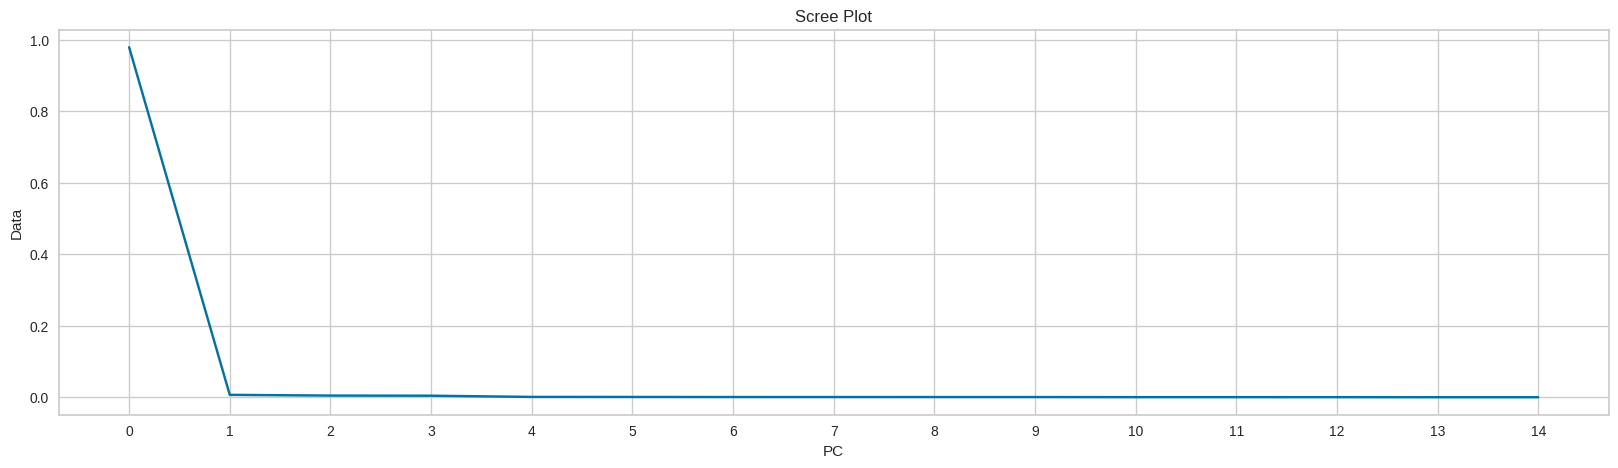

In [7]:
pca = PCA(n_components = 15)
data_pca = pca.fit_transform(data)
plt.figure(figsize=(20, 5))
plt.plot(range(data.shape[1]) ,pca.explained_variance_ratio_)
plt.xticks(range(data.shape[1]))
plt.grid(True)
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Data')
plt.show()

Higher dimensional data is problematic as after a certain number of principle components, the data becomes redundant, and the classifiers struggle to classify the data efficiently. As seen in the case of GMM herewith. Thus, optimum number of principle components that seem to define the data entirely is 4. Thus, clustering was done on first 4 principal components that seem to define the variance in all of the dataset provided.

In [8]:
data_3 = data.copy()
data_3.drop(["PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15"], axis = 1, inplace = True)
data_3.head

<bound method NDFrame.head of             PC1       PC2       PC3       PC4
0    -22.292954 -1.600691  0.330602 -0.013734
1    -21.826742 -1.622691  0.325296 -0.000968
2    -21.282700 -1.605282  0.316197 -0.023318
3    -20.712370 -1.581811  0.328290 -0.037581
4    -20.184352 -1.607353  0.315499 -0.042820
...         ...       ...       ...       ...
8895  29.880702  0.717671  0.741330  0.486916
8896  30.223616  0.681595 -0.045236  0.117989
8897  31.695759  0.511955  0.488477 -0.425023
8898  29.576042  0.758283  0.051856 -0.036747
8899  31.131782  0.657785  0.176765 -0.153051

[8900 rows x 4 columns]>

KMEANS clustering

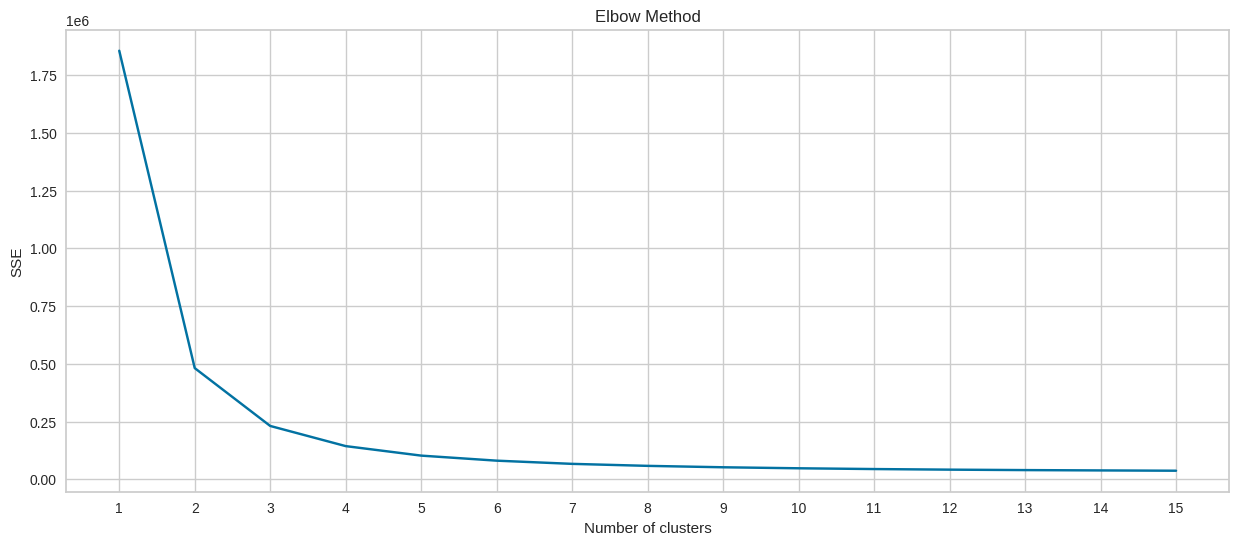

In [9]:
# To find optimal number of clusters considering full data
wcss = []
minClust = 1
maxClust = 16
for i in range(minClust, maxClust):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15, 6))
plt.plot(range(minClust, maxClust), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(np.arange(minClust, maxClust, 1))
plt.grid(True)
plt.show()

From here, we find that 3 number of clusters are appropriate for data clustering of 15 dimensional data using kmeans. We will be classifying the data into 3 clusters using GMM as well.

Silhouette Score: 0.5503
Calinski Harabasz Score: 31271.5983
Davies Bouldin Score: 0.5644


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


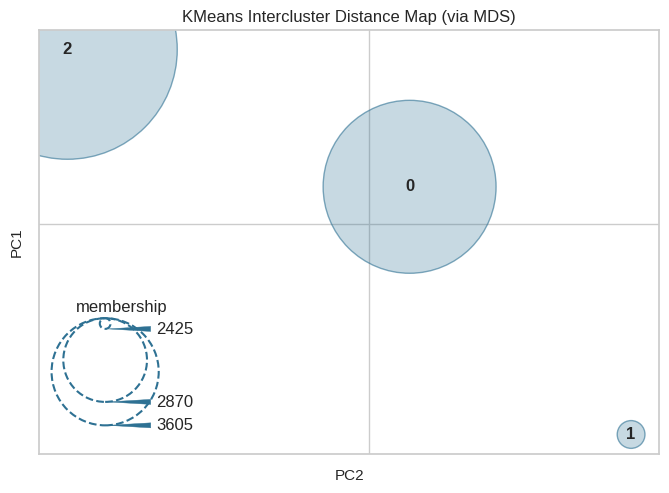

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 640)
predictions = kmeans.fit_predict(data_3)

from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Calculate cluster validation metrics
score_kemans_s = silhouette_score(data_3, kmeans.labels_, metric = 'euclidean')
score_kemans_c = calinski_harabasz_score(data_3, kmeans.labels_)
score_kemans_d = davies_bouldin_score(data_3, predictions)
# -1 means data is incorrect, 0 means it is overlapping, 1 means nicely separated (kmeans is better than gmm)
print('Silhouette Score: %.4f' % score_kemans_s)
# more the score, better the clustering of the data (kmeans is better than gmm)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
# lower the score, better is the clustering of the data (kmeans is better than gmm)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans)
visualizer.fit(data_3)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

GMM clustering

In [11]:
# define the model
model = GaussianMixture(n_components = 3, covariance_type = "full", random_state = 10)
# fit the model
model.fit(data_3)
# assign a cluster to each example
yhat = model.predict(data_3)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(data_3, yhat, metric = 'euclidean')
score_dbsacn_c = calinski_harabasz_score(data_3, yhat)
score_dbsacn_d = davies_bouldin_score(data_3, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.5040
Calinski Harabasz Score: 25759.4973
Davies Bouldin Score: 0.5858


The result comparison between K-Means and GMM was done based on 3 metrics. Silhouette Score, Calinski Harabasz Score, and Davies Bouldin Score were used to compare the two clustering methods. K-Means seemed to perform better for the dataset provided considering the metrics values obtained.

K-means clustering is easier to implement than GMM. K-means is better than GMM when scaling large datasets. K-Means is faster than GMM in performance as GMM which requires more iterations to converge. It seems that the results of clustering from k-means is easier to interpret and visualize. K-means assumes that clusters are spherical in shape, but GMM does not. GMM is a more generalizable version of K-means that can be used to cluster data with different shapes and sizes. GMM is sought to be used for a more flexible data.

Autoencoder implementation

In [12]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, Layer, InputSpec
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, activations, initializers, constraints, Sequential
from keras import backend as K
from keras.constraints import UnitNorm, Constraint

In [13]:
X_train, X_test = train_test_split(data, test_size = 0.1, random_state = 123)
nb_epoch = 140
batch_size = 16
input_dim = X_train.shape[1] #num of predictor variables
encoding_dim = 3
learning_rate = 1e-4

encoder = Dense(encoding_dim, activation="linear", input_shape = (input_dim,), use_bias = True) 
decoder = Dense(input_dim, activation="linear", use_bias = True)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics = ['accuracy'],
                    loss = 'mean_squared_error',
                    optimizer = 'adam')
autoencoder.summary()

autoencoder.fit(X_train, X_train,
                epochs=nb_epoch,
                batch_size = batch_size,
                shuffle = True,
                verbose = 0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 48        
                                                                 
 dense_1 (Dense)             (None, 15)                60        
                                                                 
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_predictions = autoencoder.predict(X_train)
print('Train reconstrunction error\n', sklearn.metrics.mean_squared_error(X_train, train_predictions))
test_predictions = autoencoder.predict(X_test)
print('Test reconstrunction error\n', sklearn.metrics.mean_squared_error(X_test, test_predictions))

251/251 [==============================] - 1s 2ms/step
Train reconstrunction error
 0.12730409787562247
28/28 [==============================] - 0s 1ms/step
Test reconstrunction error
 0.12695369562367378


In [15]:
# Comparing it with PCA implemention
pca = PCA(n_components = 3)
pca.fit(data)

# Transforming the data using the PCA model
X_pca = pca.transform(data)

# Inverse transformation of the PCA data to get the reconstructed data
X_reconstructed = pca.inverse_transform(X_pca)

# Calculating the reconstruction error as the mean squared error between the original data and the reconstructed data
reconstruction_error = np.mean((data - X_reconstructed)**2)
reconstruction_error = np.mean(reconstruction_error)
print("Reconstruction error:", reconstruction_error)

Reconstruction error: 0.1271619980109303


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


MSE of 0.12 is obtained for dimensionality reduction with autoencoders with just 1 layer whereas the MSE for PCA dimensionality reduction is 0.12. Clearly, autoencoders do a better job in dimensionality reduction for non-linear data when optimum number of layers are chosen.

In case of autoencoders, though it is tricky to estimate the number of network layers according to the dataset that is fed to it, to have an effective dimensionality reduction, it can be employed when the data is linear as well as non-linear. PCA on the other hand can be used in case dataset is linear.

PCA is computationally faster than autoencoders as autoencoders use neural networks which are computationally not cheap.

In case of autoencoders, overfitting is very much a possibility as the number of layers used may tend to overfit the predicted data on the ground truth.